# Interpreting Model Behavior

How do we understand how the model makes decisions? One window into the model's decision making process is to perturb the input sequence and see what effect that has on the predicted output. 



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
from Bio import Seq
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import FeatureLocation, CompoundLocation
import networkx as nx

In [3]:
sys.path.append("..")
from utils import *

In [4]:
path = Path('F:/genome/human/')

In [5]:
classification_df = pd.read_csv(path/'human_promoters_long.csv')

In [6]:
classification_df.columns = ['Sequence', 'Promoter', 'set']
classification_df.head()

,Sequence,Promoter,set
0,ccaGTTGAAAAGTAGAGGCCGAGGACAGAGTTAGACACTCGTTGTC...,1,train
1,ggaagggcgCAAGAGAGGATCAGGGGTCAGCGGCACACCCATGGAG...,1,train
2,TAAAGAAATACAAGGATTCCTCAAGCCCCTCTTCCCTAAAACATGC...,1,train
3,CGCGGGGCCGGGGAAGCCCGCGCGCGTCATCAGCAGCGGCGCCGCG...,1,train
4,TACACAGTAAGGACAGCCGCTGGAGCGCTACGGTCTGACGAACGAG...,1,train


In [7]:
train_df = classification_df[classification_df.set == 'train']
valid_df = classification_df[classification_df.set == 'valid']
test_df = classification_df[classification_df.set == 'test']

In [8]:
train_df.shape, valid_df.shape, test_df.shape

((56834, 3), (6316, 3), (7017, 3))

In [9]:
tok = Tokenizer(partial(GenomicTokenizer, ngram=4, stride=2), n_cpus=8, pre_rules=[], post_rules=[], special_cases=['xxpad'])

In [10]:
voc = np.load(path/'human_vocab_4mer.npy')
model_vocab = GenomicVocab(voc)

In [11]:
data_clas = GenomicTextClasDataBunch.from_df(path, train_df, valid_df[:1000], tokenizer=tok, vocab=model_vocab, 
                                             chunksize=80000, text_cols='Sequence', label_cols='Promoter', bs=50)

In [14]:
clas_config = dict(emb_sz=400, n_hid=1150, n_layers=3, pad_token=0, qrnn=False, output_p=0.4,
                       hidden_p=0.2, input_p=0.6, embed_p=0.1, weight_p=0.5)
drop_mult = 0.4

In [15]:
learn = get_model_clas(data_clas, drop_mult, clas_config)

In [16]:
learn.load('human_long_4mer_finetune_clas');

In [17]:
def plot_shuffle(idx, lengths, tss=None, inserts=None, gen_rand=False, ret=False, label='Promoter'):
    SeqShuffle = SequenceShuffler(classification_df.Sequence[idx], lengths, classification_df.Promoter[idx],
                                  tss_loc=tss, inserts=inserts, gen_rand=gen_rand)
    SeqShuffle.get_predictions(learn, path, train_df, tok, model_vocab, label)
    SeqShuffle.plot_results()
    
    if ret:
        return SeqShuffle

# Promoter Sequences

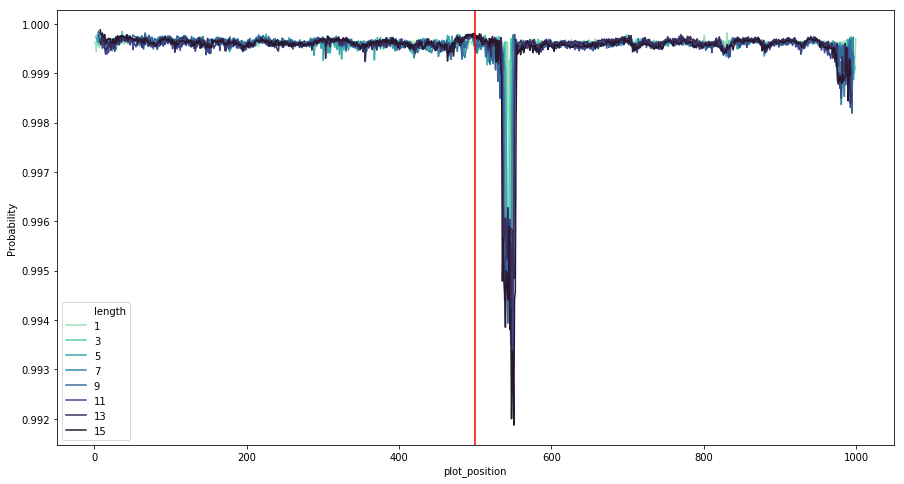

In [18]:
plot_shuffle(63150, list(range(1,16,2)), 500)

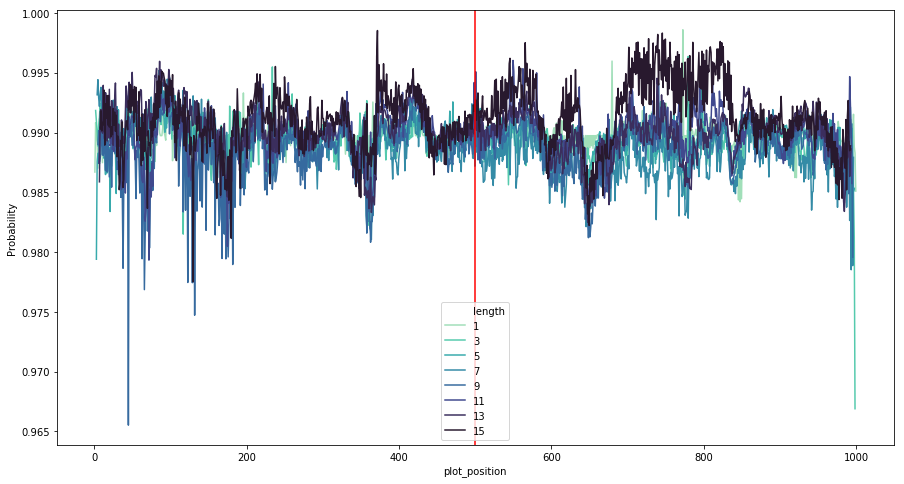

In [19]:
plot_shuffle(63175, list(range(1,16,2)), 500)

# Non-Promoter Sequences

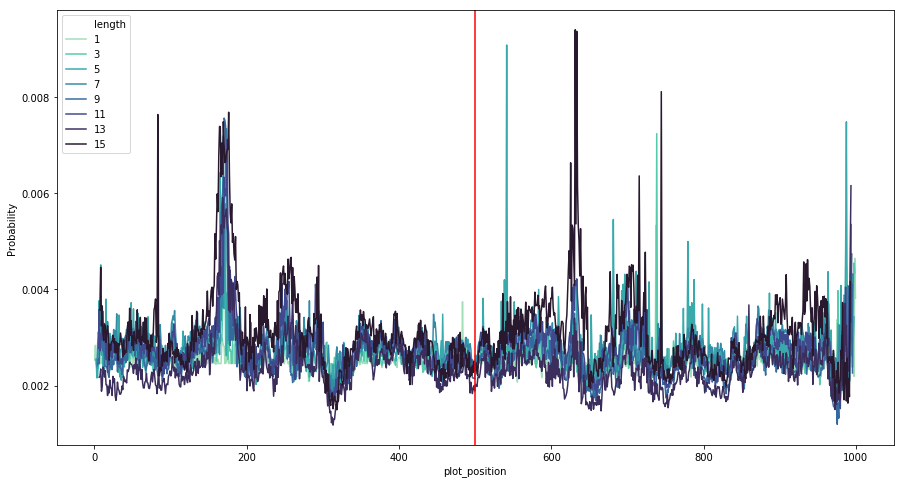

In [20]:
plot_shuffle(70138, list(range(1,16,2)), 500)

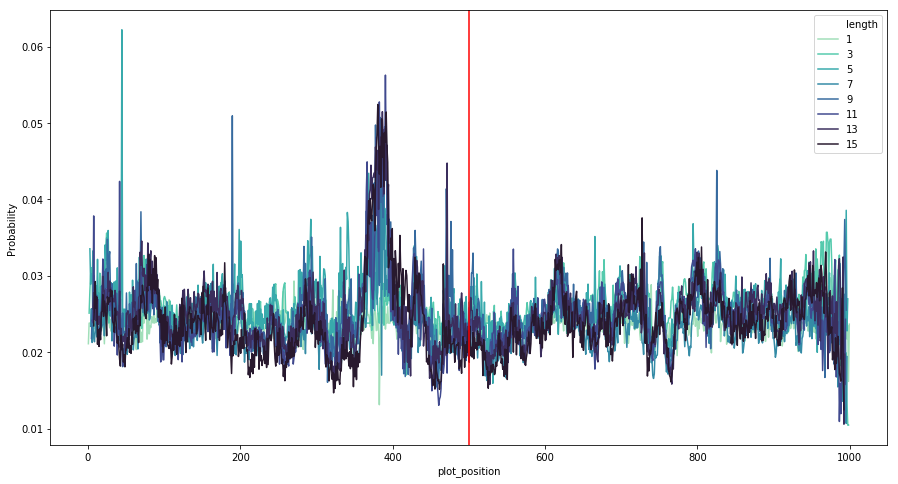

In [21]:
plot_shuffle(70165, list(range(1,16,2)), 500)